## Identifying Rose Species
This notebook will help to build a model which will identify three species of Roses.

- rosa-centifolia
- rosa-canina and 
- rosa-glauca

The dataset is manually which contains 399 items. The objective is to see the model performance with relatively a small dataset. This modelling will be done using transfer learning on resnet architecture. The pretrained model is available on pytorch resnet50 model. (https://download.pytorch.org/models/resnet50-19c8e357.pth)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *
import os
import time

In [2]:
path = Path('../input/rosespecies/roses')

In [3]:
start_time = time.time()

In [4]:
src = ImageList.from_folder('../input/rosespecies/roses/').split_by_rand_pct(0.2).label_from_folder()
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
data =src.transform(tfms , size = 128).databunch(bs = 16).normalize(imagenet_stats)

In [5]:
data

ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
rosa-centifolia,rosa-centifolia,rosa-centifolia,rosa-centifolia,rosa-centifolia
Path: ../input/rosespecies/roses;

Valid: LabelList (79 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
rosa-canina,rosa-centifolia,rosa-canina,rosa-canina,rosa-centifolia
Path: ../input/rosespecies/roses;

Test: None

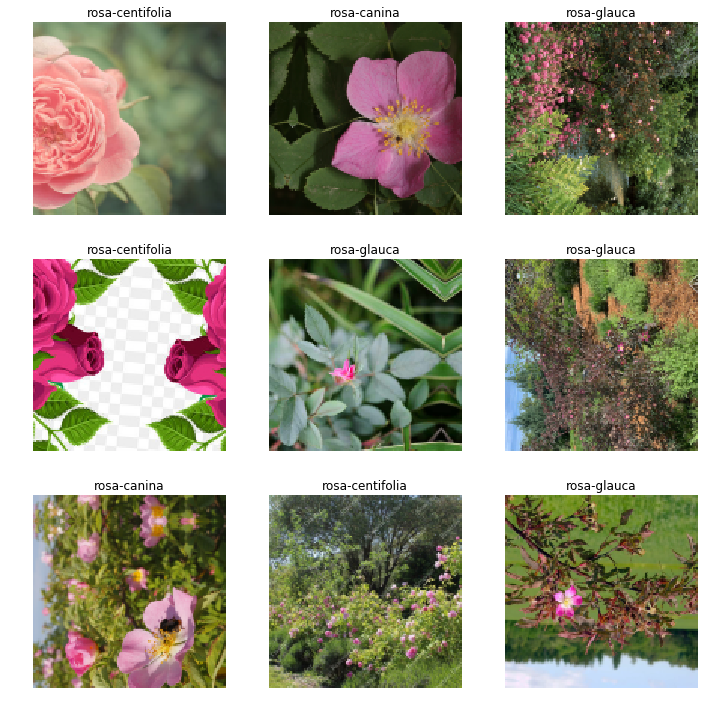

In [6]:
data.show_batch(rows=3, figsize=(10,10))

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 58.1MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


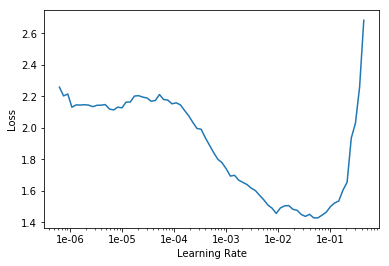

In [8]:
learn.lr_find(); learn.recorder.plot()

## Learning rate = 1e-4

In [9]:
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,2.179673,1.230625,0.582278,00:19
1,1.876359,0.703305,0.240506,00:18
2,1.418706,0.466871,0.139240,00:19
3,1.146546,0.421383,0.126582,00:19
4,0.943866,0.432871,0.126582,00:18
5,0.831106,0.401008,0.113924,00:18
6,0.730365,0.423094,0.088608,00:18
7,0.633597,0.400601,0.101266,00:18
8,0.595503,0.416389,0.113924,00:18
9,0.581483,0.393717,0.088608,00:18


Since further training has degraded the performance of the model, this is now being not done.

In [10]:
#learn.unfreeze(); learn.lr_find(); learn.recorder.plot()

In [11]:
#learn.fit_one_cycle(5, 6* 1e-5)

## Time to train (approximate, excluding lr find time)

In [12]:
time.time() - start_time

280.10831332206726

## Inference

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

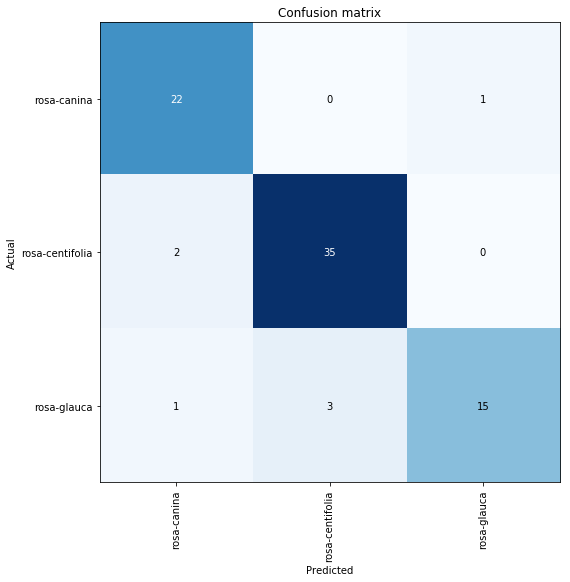

In [14]:
interp.plot_confusion_matrix(figsize=(8,8))

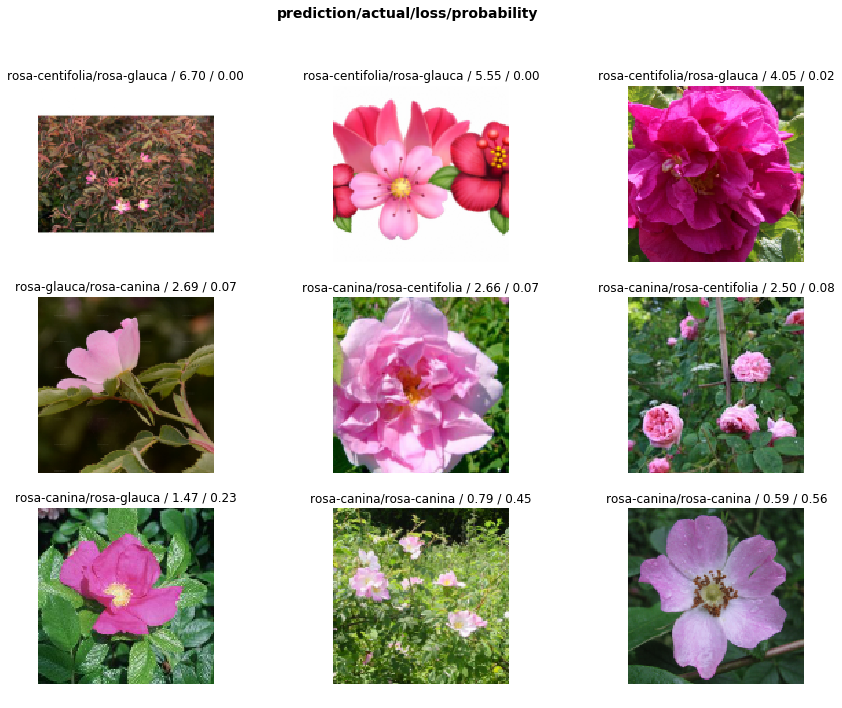

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

In [16]:
interp.most_confused(min_val = 1)

[('rosa-glauca', 'rosa-centifolia', 3),
 ('rosa-centifolia', 'rosa-canina', 2),
 ('rosa-canina', 'rosa-glauca', 1),
 ('rosa-glauca', 'rosa-canina', 1)]

In [17]:
learn.export("/kaggle/working/roses-model.pkl")
save_texts('classes.txt', data.classes)